### LASSO Regression
Dataset: Auto-MPG\
ML Package: Scikit-Learn \
Choose hyperparameter using crossvalidation

In [13]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV # GridSearchCV helps to automatically use crossvalidation to find optimal hyperparamater
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler # standardisation is important is performing lasso regression
import seaborn as sns

In [3]:
# import data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
data = pd.read_csv(url, header=None, delim_whitespace=True, names=column_names)

In [12]:
# explore data
print(data.shape)
print(data.head())
print(data.info())
print(data.isnull().sum())
data.describe().transpose()

(398, 9)
    mpg  cylinders  displacement horsepower  weight  acceleration  model year   
0  18.0          8         307.0      130.0  3504.0          12.0          70  \
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    in

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


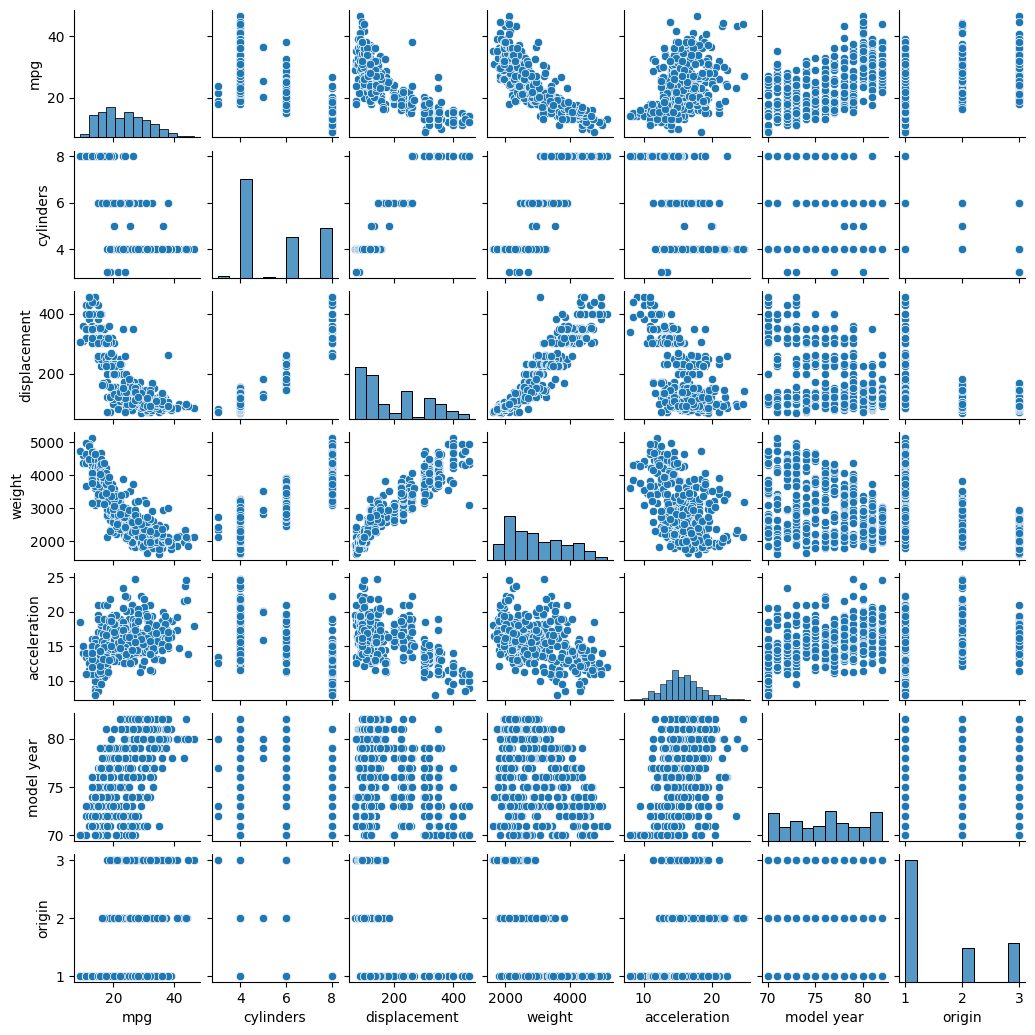

In [14]:
# visualise pairwise relationship
sns.pairplot(data, height=1.5)

In [16]:
data.replace("?",np.nan,inplace=True)
data.dropna(inplace=True)
data["horsepower"] = pd.to_numeric(data["horsepower"])

# prepare data for regression
X = data.drop(columns=["mpg","car name"])
y = data["mpg"]

# split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
# LASSO regression
lasso = Lasso(random_state=42)
scaler = StandardScaler()
pipeline = Pipeline([("scaler", scaler), ("lasso",lasso)])
param_grid = {"lasso__alpha":np.logspace(-4,4,100)}
grid = GridSearchCV(pipeline,param_grid,cv=5,scoring="neg_mean_squared_error",n_jobs=-1) # standardise x values, 
                                                                                         # calls LASSO regression
                                                                                         # makes cross validation with k = 5,  alpha = 0.8 (since 100/5 = 20%)
                                                                                         # search for optimal hyperparameter lambda
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso', Lasso(random_state=42))]),
             n_jobs=-1,
             param_grid={'lasso__alpha': array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12...
       1.38488637e+02, 1.66810054e+02, 2.00923300e+02, 2.42012826e+02,
       2.91505306e+02, 3.51119173e+02, 4.22924287e+02, 5.09413801e+02,
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04])},
             scoring='neg_mean_squared_error')

In [21]:
best_alpha = grid.best_params_["lasso__alpha"]
print(f"Optimal alpha for LASSO: {best_alpha}")

Optimal alpha for LASSO: 0.08111308307896872
